## $\color{RED}{\text{EXPLORATORY DATA ANALYSIS OF MBA COLLEGES BASED IN INDIA}}$

# $\color{blue}{\underline{ {\space  } Libraries}}$ 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import requests
from ipywidgets import interact

# $\color{blue}{\underline{ Data {\space}Collection}}$

In [105]:
NoC=[]
Exam=[]
Ratings=[]
N=[]
L=[]
f1=[]
s1=[]
ee=[]
fr=[]

In [106]:
# Scrapping the Web Page
for x in range(22,75):
    url='https://www.shiksha.com/mba/colleges/mba-colleges-india-{}'.format(x)
    url2='https://www.shiksha.com/mba/colleges/mba-colleges-india-{}?sby=ratingF'.format(x)
    r=requests.get(url)
    r2=requests.get(url2)
    soup = BeautifulSoup(r.text)
    soup2=BeautifulSoup(r2.text)
    
    Head=soup2.find_all('span',{'class':'ctpv2-rating'})
    for i in Head:
        fr.append(i.text)
    


    Head=soup.find_all('div',{'class':'instBox'})

    for j  in Head:
        name = j.find('strong' , {'class' : 'instNamev2'})
        N.append(name.text)   
        loc=j.find('span' ,{'class':'instLoc'})
        L.append(loc.text)
        
    #Fee & Salary
    num=soup.find_all('div' , attrs={'class':'flexRowEqual'})

    for i in num:
        fee=i.find_all('div',attrs={'class':'valueTxt'}) 
        for j in fee:
            f1.append(re.findall(r"₹\d+\.\d+\sL\b|₹\d+\sL\b|₹\d+\sK\b|₹\d+\.\d\sK\b",j.text))
            s1.append(re.findall(r"\d+\W\s",j.text))

        p=[]  
        for k in f1[2::6]:
            p.append(k)
        p1=[]
        for m in (p):
            if len(m) ==0:
                 p1.append(np.NaN)
            else:
                p1.append(m)
                
        #Seats        
        se=[]
        for n in s1[::6]:
            se.append(n)
        seats=[]
        for o in se:
            if len(o) ==0:
                 seats.append(np.NaN)
            else:
                seats.append(o)

    #Products
    product=soup.find_all('div',{'class':'contSec'})

    for i in product:   
        courses = i.find('a' , {'class' : 'ripple dark'})
        if courses is None:
            NoC.append(np.NaN)
        else:
            NoC.append(courses.text)

        exam = i.find('a' , {'class' : 'examLinkv2' })
        if exam is None:
            Exam.append(np.NaN)
        else:
            Exam.append(exam.text)

        ratings = i.find('span' ,{'class' : 'ctpv2-rating'})
        if ratings is None:
            Ratings.append(np.NaN)
        else:
            Ratings.append(ratings.text)

#   $\color{ blue }{\underline{Storing {\space}Data {\space}Collected {\space}into {\space}a{\space} DataFrame}}$

In [4]:
df=pd.DataFrame({'Names' : N,
                 'Loction':L,
               'No of Courses':NoC,
               'Entrance Exam':Exam,
               'Ratings':Ratings,
                'fee':p1,
                'No of Seats':seats})

In [5]:
df

,Names,Loction,No of Courses,Entrance Exam,Ratings,fee,No of Seats
0,JSS Academy of Higher Education and Research,Mysore,3 Courses,NaN,NaN,[₹1.17 L],[300+ ]
1,"S.B Patil Institute of Management, Pimpri Chin...","Nigdi, Pune",1 Course,CAT,4.0,[₹2.3 L],[180+ ]
2,"Amity University, Gwalior",Gwalior,9 Courses,CAT,NaN,[₹84 K],NaN
3,NAEMD- National Academy of Event Management an...,"Goregaon West, Mumbai",3 Courses,NaN,4.0,[₹1.8 L],NaN
4,Techno Main Salt Lake,"Salt Lake City, Kolkata",1 Course,MAT,3.0,[₹5.17 L],[120+ ]
...,...,...,...,...,...,...,...
1479,Microtek College of Management & Technology,Varanasi,1 Course,NaN,NaN,[₹1 L],[120+ ]
1480,Shri Mangalam College of Management Studies,Noida,1 Course,CAT,NaN,[₹1.19 L],NaN
1481,Manson Center of Excellence School of Business...,"Begumpet, Hyderabad",1 Course,NaN,NaN,NaN,[30+ ]
1482,"Panache Academy, Goa",Panjim,1 Course,NaN,NaN,[₹1.6 L],[120+ ]


#   $\color{blue}{\underline{ Cleaning {\space}Data}}$

In [6]:
df.isna().sum()

Names              0
Loction            0
No of Courses      0
Entrance Exam    315
Ratings          485
fee              167
No of Seats      212
dtype: int64

In [7]:
df.dropna(subset=['Ratings' , 'fee' , 'No of Seats' , 'Entrance Exam'], inplace=True)

In [8]:
df.isna().sum()

Names            0
Loction          0
No of Courses    0
Entrance Exam    0
Ratings          0
fee              0
No of Seats      0
dtype: int64

In [9]:
df

,Names,Loction,No of Courses,Entrance Exam,Ratings,fee,No of Seats
1,"S.B Patil Institute of Management, Pimpri Chin...","Nigdi, Pune",1 Course,CAT,4.0,[₹2.3 L],[180+ ]
4,Techno Main Salt Lake,"Salt Lake City, Kolkata",1 Course,MAT,3.0,[₹5.17 L],[120+ ]
5,National Institute of Bank Management (NIBM),"NIBM RD, Pune",1 Course,CAT,4.5,[₹8.4 L],[120+ ]
6,MITCON Institute of Management,"Balewadi, Pune",3 Courses,CAT,3.6,[₹5.6 L],[240+ ]
7,G.H. Patel Postgraduate Institute of Business ...,Gujarat - Other,1 Course,CAT,4.0,[₹24 K],[80+ ]
...,...,...,...,...,...,...,...
1466,"IILM University, Greater Noida",Greater Noida,7 Courses,CAT,3.8,[₹4 L],[240+ ]
1467,Rustomjee Business School,"Dahisar West, Mumbai",2 Courses,CAT,2.7,[₹2.36 L],[120+ ]
1476,Siddharth Institute of Engineering and Technol...,Andhra Pradesh - Other,1 Course,APICET,3.2,[₹54.4 K],[120+ ]
1478,Vemu Institute of Technology,Chittoor,1 Course,APICET,3.4,[₹61 K],[120+ ]


In [10]:
city=[]
for i in df['Loction'] :
    city.append(i.split(',')[-1])

In [11]:
noc=[]
for i in df['No of Courses']:
    y=(str(i).split(' ' ))[0]
    noc.append(float(y))

In [12]:
F1=[]
FEES=[]
for i in df['fee']:
    for j in i:
        F1.append( j.strip('₹'))  

In [13]:
for i in F1:
    m= float(i.split()[0])*1000
    n=float(i.split()[0])*100000
    if  i.split()[1] == 'K':
        FEES.append(m)
    else:
        FEES.append(n)
        

In [14]:
SEATS=[]
for i in df['No of Seats']:
    for j in i:
        SEATS.append(re.findall(r"\d+",j)[0])
        

In [15]:
df = df.assign(Loction=city)

In [16]:
df['No of Courses']=noc

In [17]:
df['fee']=FEES

In [18]:
df['No of Seats']=SEATS

In [19]:
r1=[]
for i in df['No of Seats']:
    r1.append(int(i))
df['No of Seats'] = r1

In [20]:
r6=[]
for i in df['fee']:
    r6.append(int(i))
df['fee'] = r6

In [21]:
r7=[]
for i in df['Ratings']:
    r7.append(float(i))
df['Ratings'] = r7

In [22]:
r8=[]
for i in df['No of Courses']:
    r8.append(int(i))
df['No of Courses'] = r8

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 1 to 1483
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Names          743 non-null    object 
 1   Loction        743 non-null    object 
 2   No of Courses  743 non-null    int64  
 3   Entrance Exam  743 non-null    object 
 4   Ratings        743 non-null    float64
 5   fee            743 non-null    int64  
 6   No of Seats    743 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 46.4+ KB


In [24]:
df= df.reset_index(drop=True)

   # $\color{blue}{\underline{Cleaned {\space}Data}}$

In [25]:
df

,Names,Loction,No of Courses,Entrance Exam,Ratings,fee,No of Seats
0,"S.B Patil Institute of Management, Pimpri Chin...",Pune,1,CAT,4.0,229999,180
1,Techno Main Salt Lake,Kolkata,1,MAT,3.0,517000,120
2,National Institute of Bank Management (NIBM),Pune,1,CAT,4.5,840000,120
3,MITCON Institute of Management,Pune,3,CAT,3.6,560000,240
4,G.H. Patel Postgraduate Institute of Business ...,Gujarat - Other,1,CAT,4.0,24000,80
...,...,...,...,...,...,...,...
738,"IILM University, Greater Noida",Greater Noida,7,CAT,3.8,400000,240
739,Rustomjee Business School,Mumbai,2,CAT,2.7,236000,120
740,Siddharth Institute of Engineering and Technol...,Andhra Pradesh - Other,1,APICET,3.2,54400,120
741,Vemu Institute of Technology,Chittoor,1,APICET,3.4,61000,120


# $\color{blue}{\underline{File {\space} Handling}}$
        

In [26]:
df.to_csv('file3.csv')

In [3]:
ds = pd.read_csv('file3.csv')

In [4]:
del ds['Unnamed: 0']

In [5]:
ds.rename(columns={'Loction':'Location'},inplace = True)

# $\color{blue}{\underline{ Data {\space}Reading}}$

In [6]:
ds.describe()

,No of Courses,Ratings,fee,No of Seats
count,743.000000,743.000000,7.430000e+02,743.000000
mean,1.830417,3.755855,2.566574e+05,148.946164
std,2.209582,0.793770,2.604246e+05,129.577313
min,1.000000,1.000000,4.800000e+03,11.000000
25%,1.000000,3.400000,1.035000e+05,60.000000
50%,1.000000,4.000000,1.640000e+05,120.000000
75%,2.000000,4.300000,3.090000e+05,180.000000
max,22.000000,5.000000,1.650000e+06,1425.000000


# Description of Each Column

In [34]:
@interact
def describe( col = num_cols):
    return ds[col].describe()

interactive(children=(Dropdown(description='col', options=('No of Courses', 'Ratings', 'fee', 'No of Seats'), …

$\color{red}{\text{ OSERVATIONS USING DESCRIBE FUNCTION : }}$ 

> * THE AVERAGE, MAX , MIN NUMBER OF COURSES OFFERED BY A MBA COLLEGE IN INDIA IS 2 , 22 ,1
> * THE    AVERAGE   RATINGS OF A  MBA COLLEGE IN INDIA IS 3.77
> * THE    AVERAGE,     MAX ,   MIN FEE OF A MBA COLLEGE IN INDIA IS    3.34L ,    23L ,   4.4K
>*  THE    AVERAGE,     MAX ,   MIN NUMBER OF SEATS IN  AN MBA COLLEGE IN INDIA IS   174 ,          3090 ,    11

 $\color{BROWN}{\huge{ Data {\space} Analysing }}$ 
## $\color{Blue}{\underline{ Univariate {\space}{\space} Analysis}}$ 

# Sepearating  Numerical and Categorical columns 

In [8]:
num_cols=ds.select_dtypes('number').columns
print(num_cols)
cat_cols=ds.select_dtypes(exclude = 'number').columns
cat_cols

Index(['No of Courses', 'Ratings', 'fee', 'No of Seats'], dtype='object')


Index(['Names', 'Location', 'Entrance Exam'], dtype='object')

# Binns Analysis

In [9]:
@interact
def binns_analysis(col = num_cols):
    return pd.cut(ds[col],10).value_counts(normalize = True)*100

interactive(children=(Dropdown(description='col', options=('No of Courses', 'Ratings', 'fee', 'No of Seats'), …

$\color{red}{\text{ OSERVATIONS USING BINNS ANALYSIS : }}$  


>   1. MORE THAN 90% OF COLLEGES OFFER 3 OR LESS NUMBER OF COURSES
    2.  ABOUT 30% OF COLLEGES FALL IN 3.8 - 4.2 RATING GROUP
    3.  APPROXIMATELY 75% COLLEGES FEES IS LESS THAN 3.3 LAKHS
    4. ONLY 7% OF THE COLLEGES HAVE MORE THAN 300 SEATS


In [27]:
@interact
def boxplot( col = num_cols):
        sns.boxplot(x = ds.head(10)[col]);

interactive(children=(Dropdown(description='col', options=('No of Courses', 'Ratings', 'fee', 'No of Seats'), …

$\color{red}{\text{ OSERVATIONS USING BOX PLOTS : }}$

> 1. Box Plots are in general plotted for  spotting Outliers and also data distribution can be read.
    2. 9 colleges have less than or equal to rating 2.
    3. 17 colleges offer more courses than the rest.
    2. we can read the mean , 25% percentile and 75% percentile of  all other numerical values.



# Distribution Plots 

In [31]:
@interact
def distplot( col = num_cols):
        sns.displot(x = ds[col] , kde = True)

interactive(children=(Dropdown(description='col', options=('No of Courses', 'Ratings', 'fee', 'No of Seats'), …

$\color{red}{\text{OBSERVATIONS:}}$ 

> * DENSITY OF __NO OF COURSES__ PEAK AT VALUE  1.
    * DENSITY OF __RATINGS__ PEAK AT VALUE BETWEEN 4 AND 4.5.
    * DENSITY OF __FEE__ PEAK IN BETWEEN O AND 5 LAKHS.
    * DENSITY OF __NO OF SEATS__ PEAK IN BETWEEN O AND 500.


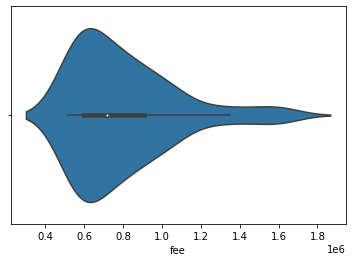

In [33]:
sns.violinplot(x = ds.sort_values(by='fee',ascending=False).head(100)['fee']);


$\color{red}{\text{OBSERVATIONS:}}$ 
> Most colleges ask for 6-7 Lakhs of fees whereas the range is from 4 to more than 18 lakhs.

## $\color{blue}{\underline{ UNIVARIATE {\space} ANALYSIS {\space}OF {\space}CATEGORICAL {\space}COLUMNS}}$

#  Entrance Exam

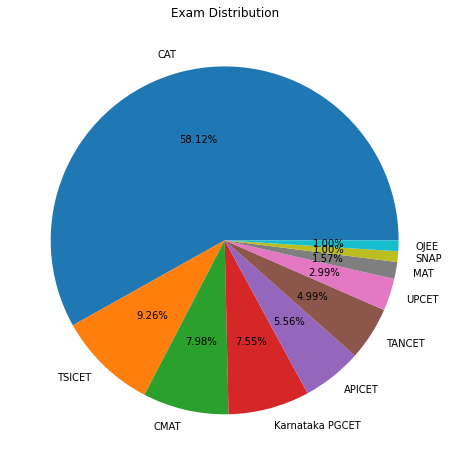

In [38]:
la=[ 'CAT','TSICET','CMAT','Karnataka PGCET','APICET','TANCET', 'UPCET','MAT','SNAP','OJEE']
f, ax = plt.subplots(1, 1, figsize = (50, 8))
plt.pie(data=ds , x = ds['Entrance Exam'].value_counts().head(10),labels=la,autopct='%.2f%%')
plt.title('Exam Distribution')
plt.show()


$\color{RED}{\text{OBSERVATIONS 1:}}$ 
> $\color{BROWN}{\text{CAT}}$  is the most preferred Entrance Exam followed by $\color{BROWN}{\text{TSICET , CMAT , Karnataka PGCET   & APICET}}$


#  LOCATION

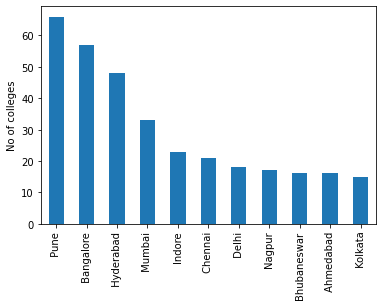

In [35]:
ds['Location'].value_counts()[:11].plot(kind='bar')
plt.ylabel('No of colleges');

$\color{RED}{\text{OBSERVATIONS:}}$  
 > Most of the colleges are concentrated in and around these big cities :    $\color{BROWN}{\text{Pune}}$  
 followed by $\color{BROWN}{\text{Banglore , Hyderabad , Mumbai  and Indore}}$
  

# $\color{blue}{\underline{ BiVARIATE {\space}{\space}ANALYSIS}}$ 

In [16]:
p=ds.sort_values(by='fee',ascending=False)[55:60]
q=ds.sort_values(by='fee',ascending=False)[130:135]
r=pd.concat([p,q])

# Location vs Fee 

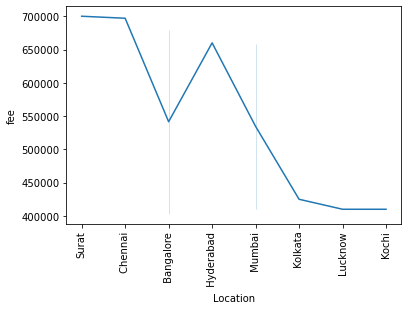

In [17]:
sns.lineplot(data=r , x='Location',y='fee',)
plt.xticks(rotation=90);

 $\color{RED}{\text{OBSERVATION:}}$  
> Surat , Chennai Banglore like popular cities are costly whereas  fees at Kochi , Lucknow is relatively cheap.

# Colleges vs Courses , Seats and Fee   

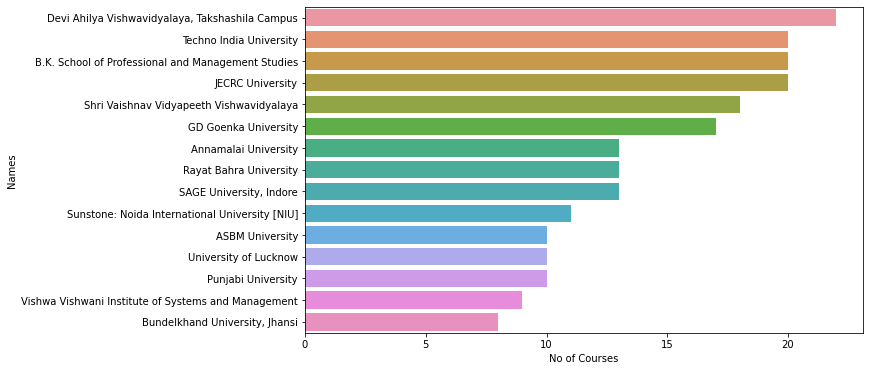

In [18]:
dn=(ds.iloc[0:,[0,2]].sort_values(by='No of Courses',ascending = False))[0:15]
f, ax = plt.subplots(1, 1, figsize = (10, 6))
plt.xticks(rotation = 0)
sns.barplot(data=dn , y = 'Names' , x='No of Courses');

 $\color{RED}{\text{OBSERVATION:}}$  
 > $\color{BROWN}{\text{Devi Ahilya Vishwavidyalaya, Takshashila Campus}}$ offers whooping 22 courses  followed by $\color{BROWN}{\text{ Techno India University , 
 BKSPMS and JECRC University }}$all three offering 20 courses each.


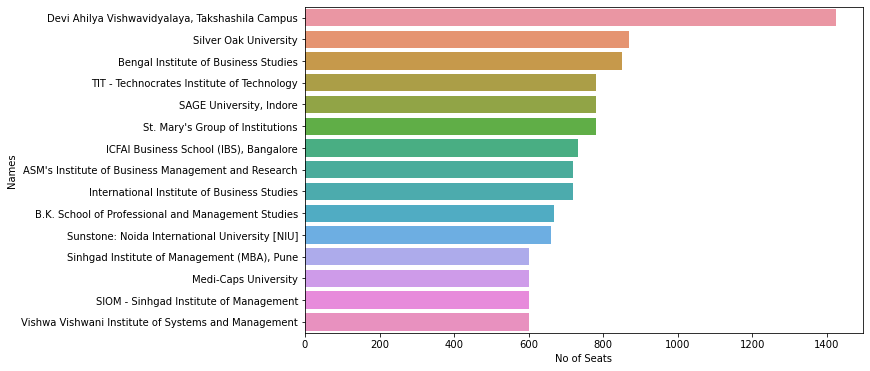

In [19]:
dn1=(ds.iloc[0:,[0,6]].sort_values(by='No of Seats',ascending = False))[0:15]
f, ax = plt.subplots(1, 1, figsize = (10, 6))
plt.xticks(rotation = 0)
sns.barplot(data=dn1 , y = 'Names' , x='No of Seats');

 $\color{RED}{\text{OBSERVATION:}}$  
 > $\color{BROWN}{\text{Devi Ahilya Vishwavidyalaya, Takshashila Campus}}$ has more than 1400 seats  followed by $\color{BROWN}{\text{   Silver Oak University , 
 BIBS  }}$ both having close to  1000 seats.

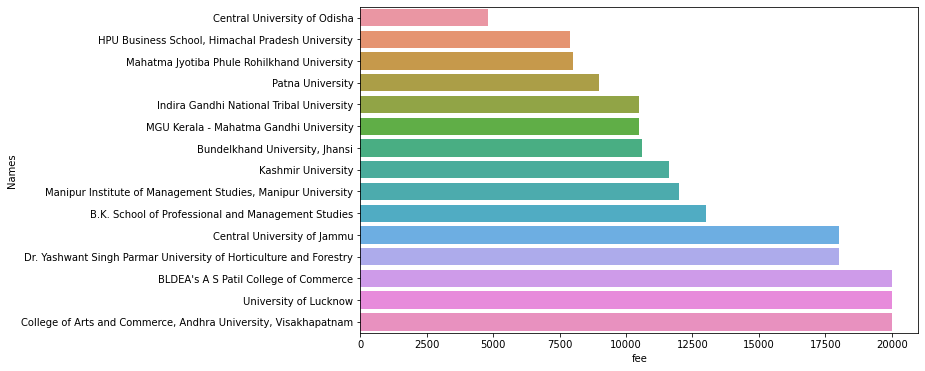

In [20]:
dn2=(ds.iloc[0:,[0,5]].sort_values(by='fee',ascending = True))[0:15]
f, ax = plt.subplots(1, 1, figsize = (10, 6))
plt.xticks(rotation = 0)
sns.barplot(data=dn2 , y = 'Names' , x='fee');

 $\color{RED}{\text{OBSERVATION:}}$  
 > $\color{BROWN}{\text{Central University of Odisha}}$ has least fee   followed by $\color{BROWN}{\text{ HPU Business School, Himachal Pradesh University , 
 Patna University   }}$ .

# $\color{blue}{\underline{ MULTI-VARIATE {\space} ANALYSIS}}$

In [21]:
crosstab=pd.crosstab(ds.sort_values(by='fee',ascending=False)['Location'][0:100],ds['Names'][0:100],ds['fee'][0:100],aggfunc='mean')

# Location vs Mean Fee vs Colleges 

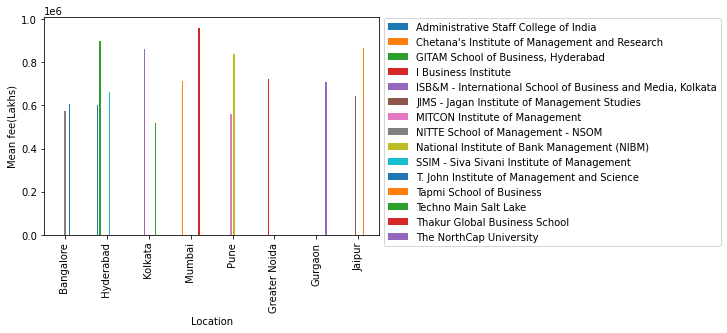

In [22]:
b=crosstab.plot(kind='bar')
b.legend( bbox_to_anchor=(1, 1.02),loc='upper left')
plt.ylabel('Mean fee(Lakhs)');

$\color{RED}{\text{ OSERVATION: }}$ 
> Colleges Based on Location along with respective fees 

# Corelation between Numerical Features

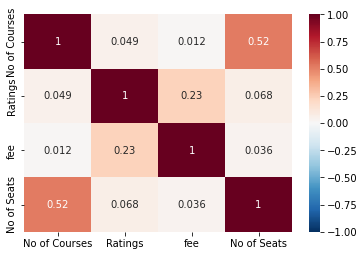

In [23]:
sns.heatmap(
    ds.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

$\color{RED}{\text{ OBSERVATION:}}$ 
> Based on the Heat Map , we can figure out that all the numerical variables are positively co-related. 

# Location vs Fee vs Rating 

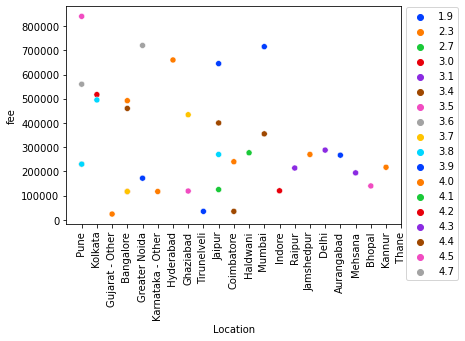

In [24]:
plt.xticks(rotation = 90)
sns.scatterplot(
    x=ds['Location'],
    y=ds['fee'], 
    data=ds,
    palette='bright',
    hue=ds['Ratings'][0:35])
plt.legend( bbox_to_anchor=(1, 1.02),
         loc='upper left');

$\color{RED}{\text{ OBSERVATION:}}$ 
>Based on Location and Fee , we determine the ratings.

#### Below are the Scenario Cases where User is allowed to Select available features , in reutrn it  will  suggest colleges matching the input data

 #### $\color{BLUE}{\underline{ Scenario{\space}{\space}1: }}$ $\color{red}{\text{User is allowed to choose maximum  and  minimum fees }}$ $\color{red}{\text{No of courses  and minimum Rating}}$

In [25]:
@interact
def filter_ (Ncourses=ds['No of Courses'].unique() , MaFee= range (0,2500000,100000),MiFee= range (0,2500000,100000) , MiRating=range(0,5) ):
    return ds[(ds['fee'] <=MaFee)& (ds['fee'] >= MiFee)&(ds['Ratings'] >= MiRating) & (ds['No of Courses'] >= Ncourses)]

interactive(children=(Dropdown(description='Ncourses', options=(1, 3, 5, 4, 2, 20, 13, 6, 10, 9, 22, 8, 17, 7,…

####  $\color{blue}{\underline{ Scenario{\space} {\space}2 : }}$ $\color{red}{\text{User is allowed to choose Location, Entrance Exam and }}$ $\color{red}{\text{No of Seats}}$

In [26]:
@interact
def choose(Location=ds['Location'].unique(),MiSeats = range(0,4000,100),Exam=ds['Entrance Exam'].unique()):
    return ds[(ds['Location'] == Location) & (ds['No of Seats'] >= MiSeats) & (ds['Entrance Exam'] == Exam)]

interactive(children=(Dropdown(description='Location', options=(' Pune', ' Kolkata', 'Gujarat - Other', ' Bang…